In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import os as os
import tensorflow as ts
import tensorflow.keras as ks
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Read in Data


In [153]:
# read in data
df = pd.read_csv("./processed_data/pca_data.csv", index_col=0)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 477
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cinderella                 478 non-null    float64
 1   Number of Tournament Wins  478 non-null    float64
 2   3pt_0                      478 non-null    float64
 3   Free Throw-Rebound_0       478 non-null    float64
 4   Free Throw-Rebound_1       478 non-null    float64
 5   Free Throw-Rebound_2       478 non-null    float64
 6   Region_0                   478 non-null    float64
 7   PPG_0                      478 non-null    float64
 8   PPG_1                      478 non-null    float64
 9   Scoring Differential_0     478 non-null    float64
 10  Assist_0                   478 non-null    float64
 11  Schedule_0                 478 non-null    float64
 12  Win-Loss_0                 478 non-null    float64
dtypes: float64(13)
memory usage: 52.3 KB


## Create Model

### Neural Network

- Several fully-connected layers
    - Try 256, 128, 64, 32, 7/11

#### Output

##### Win-based

- 7 output nodes, predict number of wins (0-6)
- Apply softmax function at end to get probability

##### Rank-based

- Find the optimal ranking of teams for each year
- 11 output nodes, predict which rank (0-10) the team should be placed in

In [155]:
X = df.drop(columns=['Cinderella','Number of Tournament Wins'])
# y = df[['Cinderella','Number of Tournament Wins']]
y = pd.get_dummies(df['Number of Tournament Wins'])

In [172]:
model_1 = ks.Sequential()

In [173]:
model_1.add(layers.Input(shape=X.shape[1],))

In [174]:
model_1.add(layers.Dropout(0.1))

In [175]:
model_1.add(layers.Dense(256, activation='relu', kernel_regularizer = ks.regularizers.l2(.0001)))

In [176]:
model_1.add(layers.Dropout(0.1))

In [177]:
model_1.add(layers.Dense(128, activation='relu', kernel_regularizer = ks.regularizers.l2(.0001)))

In [178]:
model_1.add(layers.Dropout(0.05))

In [179]:
model_1.add(layers.Dense(64, activation='relu', kernel_regularizer = ks.regularizers.l2(.0001)))

In [180]:
model_1.add(layers.Dropout(0.05))

In [181]:
model_1.add(layers.Dense(32, activation='relu', kernel_regularizer = ks.regularizers.l2(.0001)))

In [182]:
model_1.add(layers.Dense(7, activation='softmax'))

In [183]:
model_1.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [184]:
model_1.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_12 (Dropout)         (None, 11)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               3072      
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)              

In [185]:
ks.utils.plot_model(model_1, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [186]:
res = model_1.fit(X,y, epochs = 180, batch_size = 32)

Epoch 1/180
15/15 [==============================] - 1s 2ms/step - loss: 1.5819 - accuracy: 0.4582
Epoch 2/180
15/15 [==============================] - 0s 2ms/step - loss: 1.2856 - accuracy: 0.5167
Epoch 3/180
15/15 [==============================] - 0s 2ms/step - loss: 1.2089 - accuracy: 0.5544
Epoch 4/180
15/15 [==============================] - 0s 2ms/step - loss: 1.1690 - accuracy: 0.5607
Epoch 5/180
15/15 [==============================] - 0s 2ms/step - loss: 1.1644 - accuracy: 0.5628
Epoch 6/180
15/15 [==============================] - 0s 2ms/step - loss: 1.1369 - accuracy: 0.5753
Epoch 7/180
15/15 [==============================] - 0s 2ms/step - loss: 1.1156 - accuracy: 0.5753
Epoch 8/180
15/15 [==============================] - 0s 2ms/step - loss: 1.1139 - accuracy: 0.5502
Epoch 9/180
15/15 [==============================] - 0s 2ms/step - loss: 1.1010 - accuracy: 0.5586
Epoch 10/180
15/15 [==============================] - 0s 2ms/step - loss: 1.0537 - accuracy: 0.6025
Epoch 11/

15/15 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.8054
Epoch 84/180
15/15 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.8138
Epoch 85/180
15/15 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.8305
Epoch 86/180
15/15 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.8326
Epoch 87/180
15/15 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.8201
Epoch 88/180
15/15 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.7992
Epoch 89/180
15/15 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.8264
Epoch 90/180
15/15 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.8431
Epoch 91/180
15/15 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.8117
Epoch 92/180
15/15 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.8201
Epoch 93/180


15/15 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8849
Epoch 165/180
15/15 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.8745
Epoch 166/180
15/15 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.8787
Epoch 167/180
15/15 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.8828
Epoch 168/180
15/15 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8787
Epoch 169/180
15/15 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8933
Epoch 170/180
15/15 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8766
Epoch 171/180
15/15 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8975
Epoch 172/180
15/15 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.8808
Epoch 173/180
15/15 [==============================] - 0s 2ms/step - loss: 0.3625 - accuracy: 0.8996
Epoc

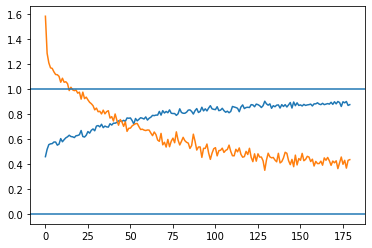

In [188]:
plt.plot(res.epoch, res.history['accuracy'])
plt.plot(res.epoch, res.history['loss'])
plt.axhline(y=0)
plt.axhline(y=1)
plt.show()

## Validate Results

- Want to pick several Cinderella teams for bottom 4-6 predictions
